In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Import dataset
dataset = 'dataset/loan.csv'
df = pd.read_csv(dataset)

In [93]:
total_missing = df.isnull().sum().sum()

print("Total missing values in the entire dataset:", total_missing)

Total missing values in the entire dataset: 149


In [94]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

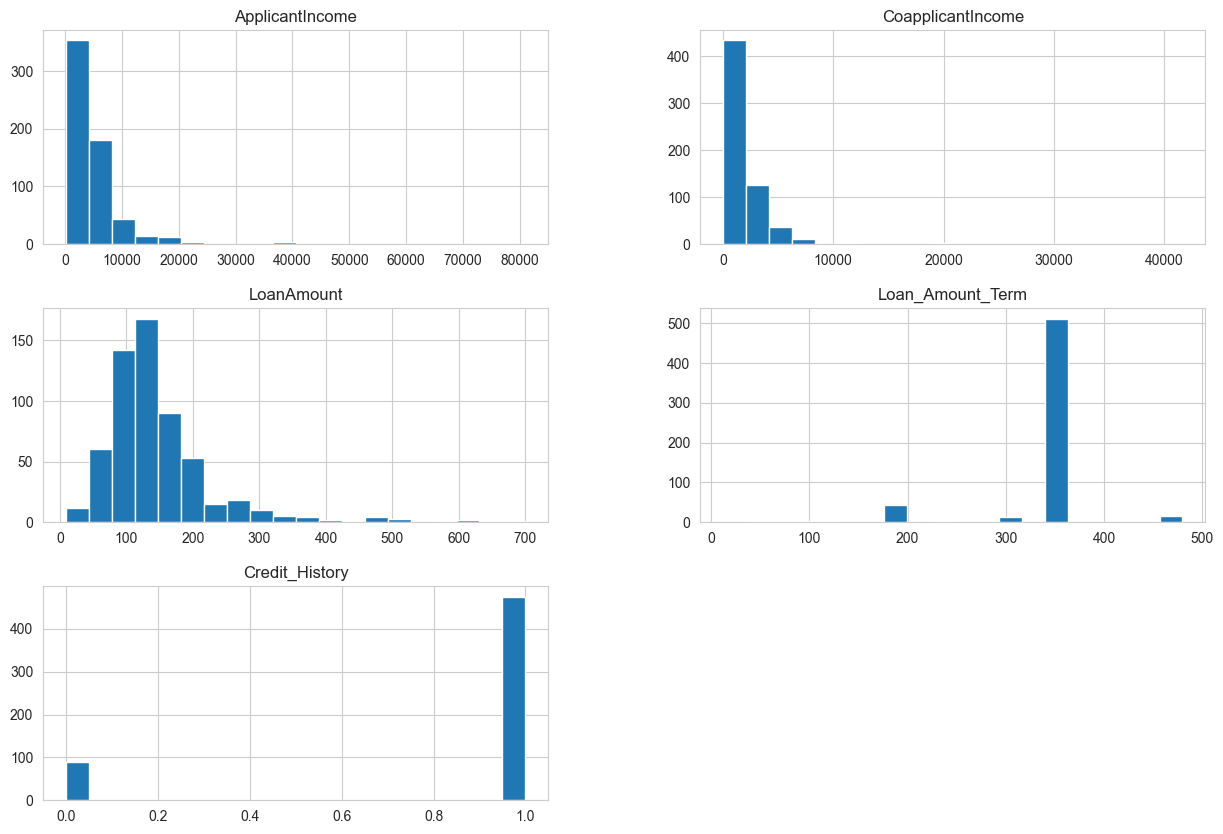

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = df.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(bins=20, figsize=(15, 10))
plt.show()

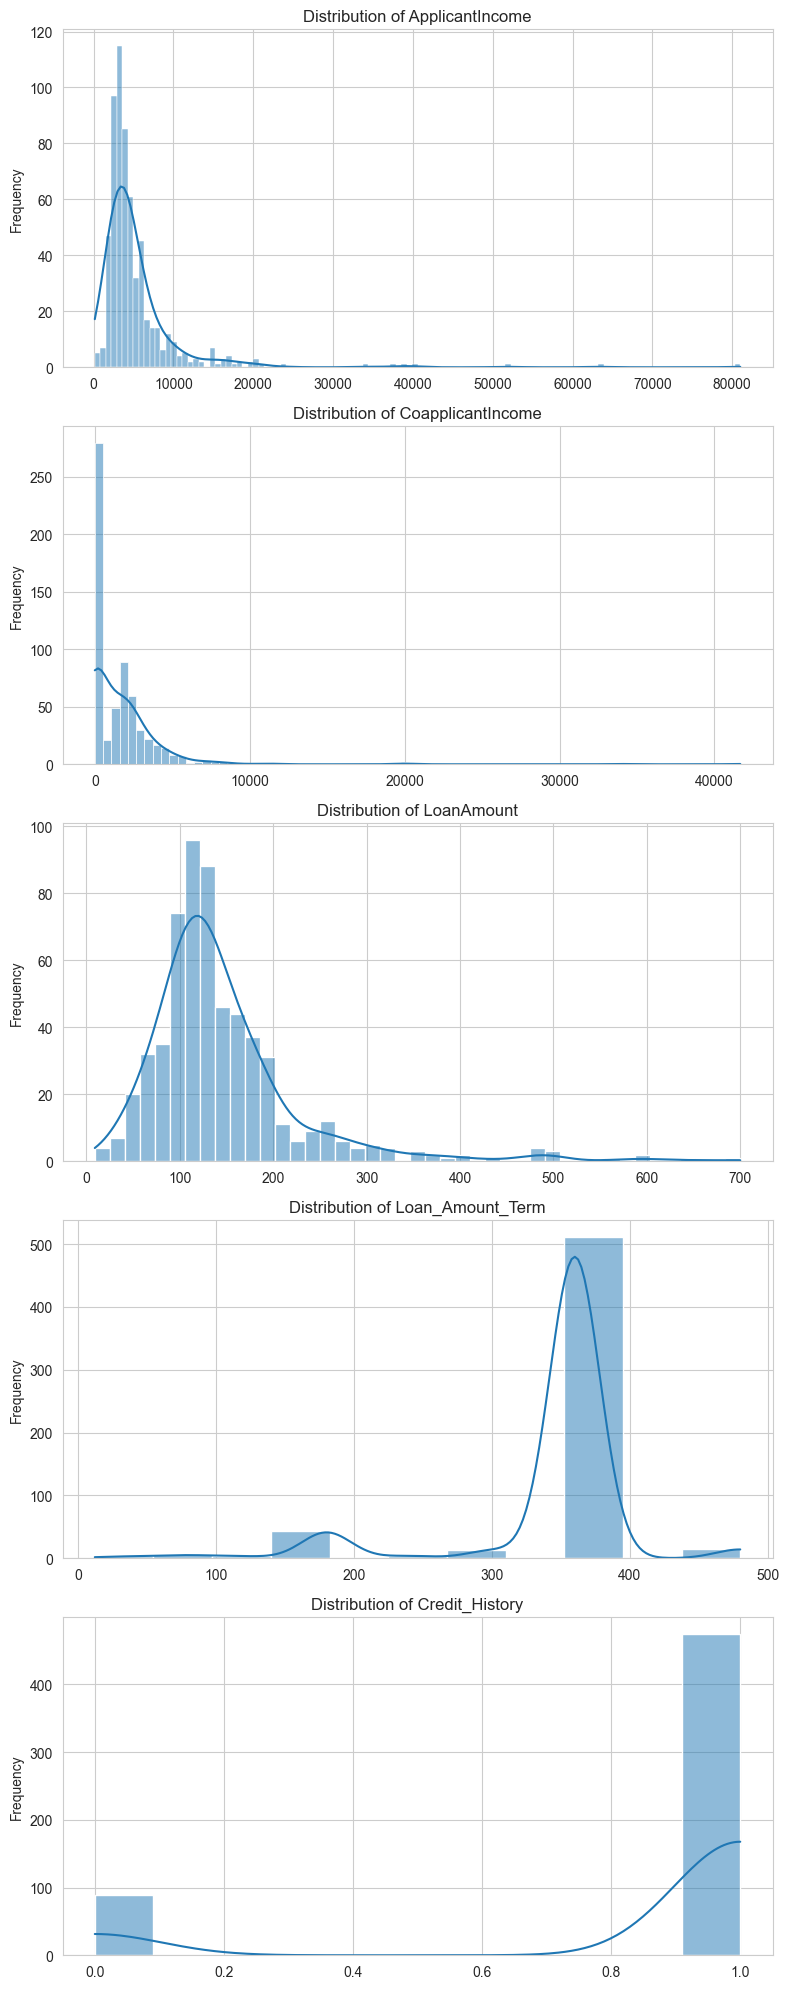

In [96]:
# List of numeric columns to analyze
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plotting distributions
fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(8, 20))

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=ax[i])
    ax[i].set_title('Distribution of ' + col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# mengatasi missing values
imputer = SimpleImputer(strategy='mean')
df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# Convert kategorikal variabel  ke numerik
label_encoders = {}
for column in ['Loan_ID','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


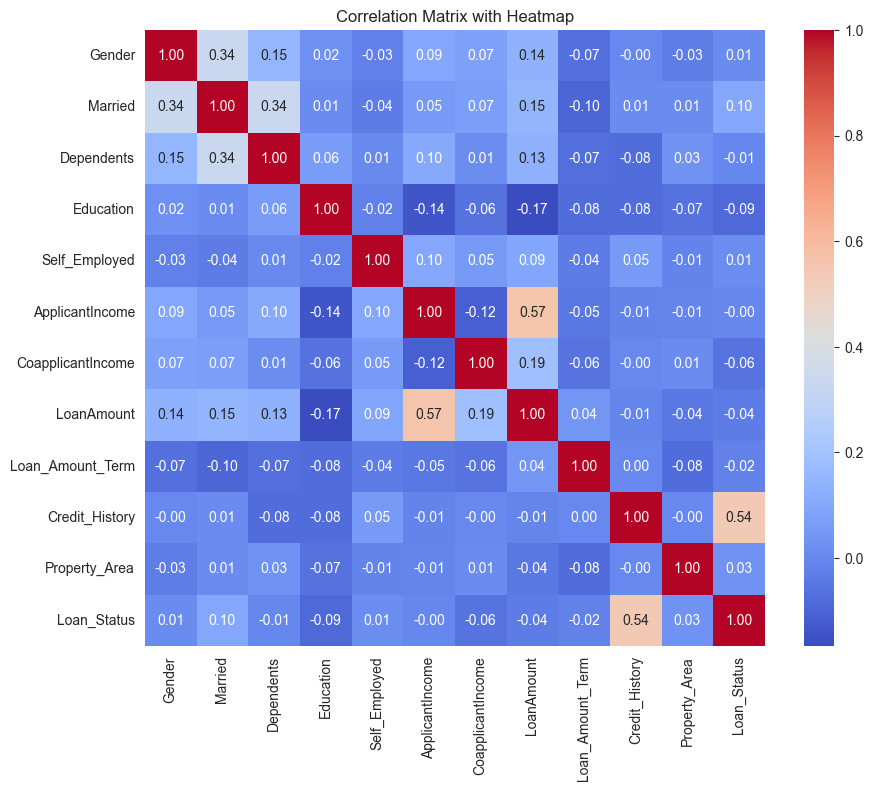

In [98]:
# Calculate the correlation matrix
corr = df.drop('Loan_ID', axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Heatmap')
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparing the data
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the dataframe
display(features_df)

,Feature,Importance
9,Credit_History,0.274897
5,ApplicantIncome,0.185930
7,LoanAmount,0.178852
6,CoapplicantIncome,0.103506
8,Loan_Amount_Term,0.053479
2,Dependents,0.050629
10,Property_Area,0.048515
0,Gender,0.029918
4,Self_Employed,0.029134
1,Married,0.023521


In [100]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Initializes the RFE model with a Logistic Regression estimator
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfe = rfe.fit(X_train, y_train)

# Creating a dataframe to display RFE results
rfe_results_df = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})

# Displays the dataframe
display(rfe_results_df)

/Users/bayusetia/Downloads/pert9ML/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bayusetia/Downloads/pert9ML/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,Feature,Selected,Ranking
0,Gender,False,4
1,Married,False,2
2,Dependents,False,6
3,Education,False,3
4,Self_Employed,False,7
5,ApplicantIncome,False,11
6,CoapplicantIncome,False,10
7,LoanAmount,False,8
8,Loan_Amount_Term,False,9
9,Credit_History,True,1


In [101]:
# Checking for missing values in each column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for common rows between training and testing sets
common_rows = pd.merge(X_train, X_test, how='inner')

print('Missing Data:\
', missing_data)
print('\
Common Rows between Training and Testing Sets:', len(common_rows))

Missing Data: Series([], dtype: int64)
Common Rows between Training and Testing Sets: 0


In [102]:
# Calculating the correlation matrix for numeric variables
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
correlation_matrix = df[numeric_columns].corr()

# Displays the correlation matrix
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.565620
CoapplicantIncome,-0.116605,1.000000,0.187828
LoanAmount,0.565620,0.187828,1.000000


In [103]:
# Displaying the minimum and maximum values for each predictor variable
descriptive_stats = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].describe().loc[['min', 'max']]

# Displaying the descriptive statistics for the range assessment
descriptive_stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
min,150.0,0.0,9.0,0.0
max,81000.0,41667.0,700.0,1.0


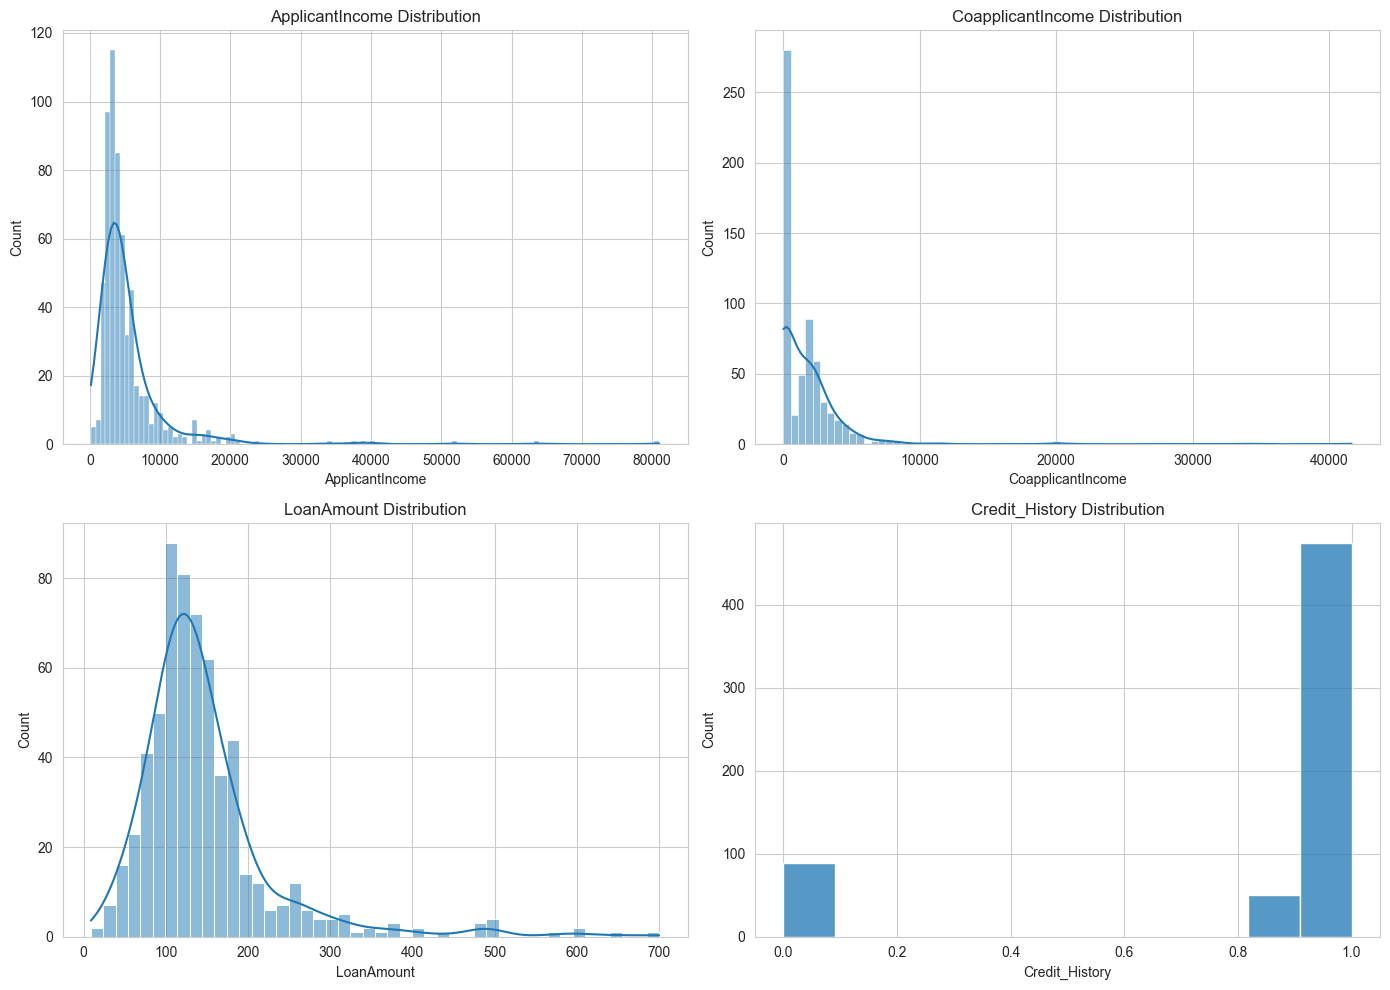

In [104]:
# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Plots distributions for numeric predictor variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('ApplicantIncome Distribution')

sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('CoapplicantIncome Distribution')

sns.histplot(df['LoanAmount'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('LoanAmount Distribution')

sns.histplot(df['Credit_History'].dropna(), kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Credit_History Distribution')

plt.tight_layout()
plt.show()

In [105]:
# Identifying outliers using IQR method for ApplicantIncome, CoapplicantIncome, and LoanAmount
Q1 = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile(0.25)
Q3 = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 * IQR from the Q1 and Q3
outliers = ((df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] < (Q1 - 1.5 * IQR)) |
 (df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
outlier_count = outliers.sum()

# Display the number of outliers
print('Number of outliers detected:', outlier_count)

# Display the percentage of data considered as outliers
print('Percentage of data considered as outliers:', (outlier_count / len(df) * 100), '%')

Number of outliers detected: 79
Percentage of data considered as outliers: 12.866449511400651 %


In [106]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

# Select only numeric columns for imputation
numeric_data = df.select_dtypes(include=[np.number])

# Drop rows with missing values and reset index
numeric_data.dropna(inplace=True)
numeric_data.reset_index(drop=True, inplace=True)

In [107]:
# Function to remove and impute data
def remove_and_impute(data, fraction, imputer):
    # Remove a fraction of data randomly
    np.random.seed(42) # Ensure reproducibility
    missing_indices = np.random.choice(data.index, size=int(fraction*len(data)), replace=False)
    missing_data = data.copy()
    missing_data.loc[missing_indices] = np.nan

    # Impute missing values
    imputed_data = pd.DataFrame(imputer.fit_transform(missing_data), columns=missing_data.columns)

    # Calculate the mean squared error for the imputed values
    mse = mean_squared_error(data.loc[missing_indices], imputed_data.loc[missing_indices], multioutput='raw_values')
    return mse

In [108]:
# Imputation methods
imputers = {
    'Mean': SimpleImputer(strategy='mean'),
    'KNN': KNNImputer(n_neighbors=5),
    'Iterative': IterativeImputer(max_iter=10, random_state=0)
}

# Fractions of data to remove
fractions = [0.01, 0.05, 0.1]

# Results dictionary
results = {}

# Perform removal and imputation
for name, imputer in imputers.items():
    results[name] = {}
    for fraction in fractions:
        mse = remove_and_impute(numeric_data, fraction, imputer)
        results[name][f'{fraction*100}%'] = mse

In [109]:
# Display results
print('Imputation Results:')
for method, fractions_results in results.items():
    print(f'\
{method} Imputation:')
    for fraction, mse in fractions_results.items():
        print(f'Fraction removed: {fraction}, MSE: {mse}')

Imputation Results:
Mean Imputation:
Fraction removed: 1.0%, MSE: [3.72626752e+04 1.38918946e-01 2.22299169e-01 7.02630858e-01
 4.85738400e-02 5.76631752e-02 7.17357949e+06 1.83967835e+06
 3.36377696e+03 3.30426290e+02 2.10940576e-02 5.44591846e-01
 9.97229917e-02]
Fraction removed: 5.0%, MSE: [2.53701235e+04 9.41452430e-02 2.58613053e-01 1.72205777e+00
 1.23524582e-01 2.11146361e-01 7.72253040e+06 2.11278637e+06
 3.18100534e+03 4.21579363e+03 4.74226914e-02 5.71095265e-01
 1.51119660e-01]
Fraction removed: 10.0%, MSE: [3.30968662e+04 1.26003915e-01 2.34118811e-01 1.48641161e+00
 1.58592937e-01 2.09357185e-01 2.68683871e+07 2.05139443e+06
 6.01853615e+03 2.68052784e+03 1.13087317e-01 6.35067726e-01
 2.20654390e-01]
KNN Imputation:
Fraction removed: 1.0%, MSE: [3.72626752e+04 1.38918946e-01 2.22299169e-01 7.02630858e-01
 4.85738400e-02 5.76631752e-02 7.17357949e+06 1.83967835e+06
 3.36377696e+03 3.30426290e+02 2.10940576e-02 5.44591846e-01
 9.97229917e-02]
Fraction removed: 5.0%, MSE: [

In [110]:
# check missing values in variables

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [111]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
df['Loan_Status'].isnull().sum()

0

In [113]:
X = df.drop(['Loan_Status'], axis=1)

y = df['Loan_Status']

In [114]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [115]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((411, 12), (203, 12))

In [116]:
# check data types in X_train

X_train.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [117]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
244,244,1,1,0,1,0,3406,4417.0,123.0,360.0,1.0,1
393,393,1,1,2,1,0,1993,1625.0,113.0,180.0,1.0,1
310,310,0,0,0,0,0,2917,0.0,84.0,360.0,1.0,1
408,408,1,1,1,0,0,8300,0.0,152.0,300.0,0.0,1
572,572,1,1,2,0,0,16666,0.0,275.0,360.0,1.0,2


In [118]:
# import category encoders

import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Loan_ID'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/Users/bayusetia/Downloads/pert9ML/env/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Users/bayusetia/Downloads/pert9ML/env/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Users/bayusetia/Downloads/pert9ML/env/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcast

In [119]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
244,1,1,1,0,1,0,3406,4417.0,123.0,360.0,1.0,1
393,2,1,1,2,1,0,1993,1625.0,113.0,180.0,1.0,1
310,3,0,0,0,0,0,2917,0.0,84.0,360.0,1.0,1
408,4,1,1,1,0,0,8300,0.0,152.0,300.0,0.0,1
572,5,1,1,2,0,0,16666,0.0,275.0,360.0,1.0,2


In [120]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,-1.0,1,1,0,0,0,9083,0.0,228.0,360.0,1.000000,1
377,-1.0,1,1,0,0,0,4310,0.0,130.0,360.0,0.842199,1
163,-1.0,1,1,2,0,0,4167,1447.0,158.0,360.0,1.000000,0
609,-1.0,0,0,0,0,0,2900,0.0,71.0,360.0,1.000000,0
132,-1.0,1,0,0,0,0,2718,0.0,70.0,360.0,1.000000,1


In [121]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]  # Eksperimen dengan berbagai nilai test_size
results = []

for test_size in test_sizes:
    # Memisahkan data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    # Membuat model Decision Tree
    clf = DecisionTreeClassifier()

    # Melatih model
    clf.fit(X_train, y_train)

    # Melakukan prediksi
    y_pred = clf.predict(X_test)

    # Mengukur akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan hasil eksperimen
    results.append({'Test_size': test_size, 'Accuracy': accuracy})

# Menampilkan hasil eksperimen
print("Hasil Eksperimen:")
print("Test_size\tAccuracy")
for result in results:
    print("{:.1f}\t\t{:.2f}%".format(result['Test_size'], result['Accuracy'] * 100))

Hasil Eksperimen:
Test_size	Accuracy
0.2		73.98%
0.3		68.65%
0.4		72.36%
0.5		70.68%
0.6		71.00%


In [122]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=1)

In [123]:
y_pred_gini = clf_gini.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7805


In [125]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [126]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


Training-set accuracy score: 0.8204


In [127]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8204
Test set score: 0.7805


[Text(0.4583333333333333, 0.875, 'x[10] <= 0.421\ngini = 0.431\nsamples = 245\nvalue = [77, 168]'),
 Text(0.25, 0.625, 'x[8] <= 547.5\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 522.0\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.25, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[7] <= 4823.0\ngini = 0.34\nsamples = 212\nvalue = [46, 166]'),
 Text(0.5, 0.375, 'x[11] <= 1.5\ngini = 0.326\nsamples = 205\nvalue = [42, 163]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.276\nsamples = 151\nvalue = [25.0, 126.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.431\nsamples = 54\nvalue = [17, 37]'),
 Text(0.8333333333333334, 0.375, 'x[8] <= 208.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [

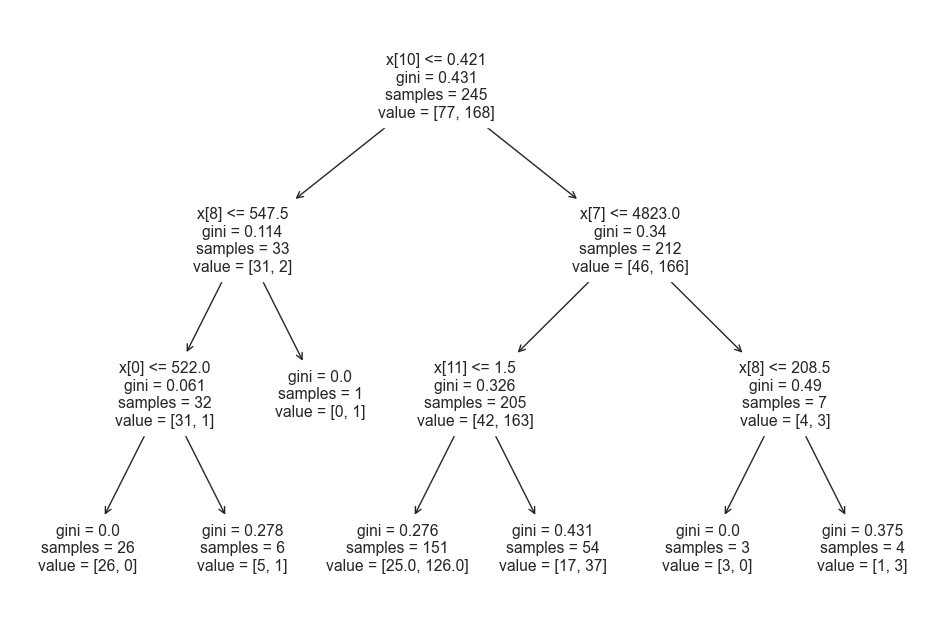

In [128]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 